# The Relationship Between CO2 Emissions and Land Temperature

Think about your morning today. How many times did you utilize electricity? Did you plug in your coffee maker after turning on the lights and heating up leftovers in the microwave? On your daily commute, did you ride in a train or ride in a car? Did you pass by 
a plot of land that was once a field full of trees?

The burning of fossil fuels to generate electricty and to power trains, cars, and boats releases CO2 into the air.Trees can absorb the CO2 from the air,
but not when they are cut down.

According the US Environmental Protection Agency, 80% of greenhouse gases in the United States come from CO2.These greenhouse gases
prevent solar energy from being released into the atmosphere.

Although the topic of climate change can stir up a political debate, I have no intention of doing so. I simply desire to analyze the data just as I would for a project covering any other topic.
My objective is to answer the following question: is there a relationship between CO2 Emissions and Global Temperature?

## The Data


To conduct the analysis, I access two datasets from Kaggle.
The first dataset is the "Global Temperature" dataset from the Earth Surface Temperature Data collection on Kaggle. The dataset 
provides monthly records of average temperatures (in degrees Celsius) since 1750.

The second dataset is "Carbon Dioxide Levels in the Atmosphere." It provides monthly records of atmospheric CO2 levels collected at the Mauna Loa Observatory since 1958. The observatory is in a remote location in Hawaii where air is representatitve of the Earth's atmosphere.



First, I download the necessary packages.

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, I load the necessary datasets. The first dataset is the Global Temperatures dataset. The next dataset is the CO2 Emissions dataset. 


In [688]:
with open('../../../datasets/TempData/GlobalTemperatures.csv') as file:
    df_temp=pd.read_csv(file)

with open('../../../datasets/TempData/archive.csv') as file:
    df_poll=pd.read_csv(file)



## Vetting Data Sources

The Globabl Temperatures dataset is provided by Berkeley Earth, which is affiliated with Lawrence Berkely National Laboratory.
It is a compilaton of over 1.6 billion temperature reports from 16 archives.

The CO2 Emissions dataset was published by the
University of California's Scripps Institution of Oceanography with support from the US Department of Energy, Earth Networks, and the National Science Foundation.

## Data Analysis

First, I check out the Global Temperatures dataset.

In [689]:
df_temp.head()

,dt,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1750-01-01,1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,1750,5.626,3.076,NaN,NaN,NaN,#NAME?,NaN
3,1750-04-01,1750,8.490,2.451,NaN,NaN,NaN,#NAME?,NaN
4,1750-05-01,1750,11.573,2.072,NaN,NaN,NaN,8.719363636,NaN


In [690]:
df_temp['dt'].dtype

dtype('O')

The dt column shows the Year, Month, and Day of the record. 
I need to convert it to a date format.

In [691]:
df_temp['dt']=pd.to_datetime(df_temp['dt'])
df_temp.dt.dtype

dtype('<M8[ns]')

Next, I want to identify the mean Land Average Temperature for each year. 

In [692]:
df_temp['mean_temp'] = df_temp.groupby('Year').LandAverageTemperature.transform(np.mean)
df_temp.head()

,dt,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,mean_temp
0,1750-01-01,1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,8.719364
1,1750-02-01,1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,8.719364
2,1750-03-01,1750,5.626,3.076,NaN,NaN,NaN,#NAME?,NaN,8.719364
3,1750-04-01,1750,8.490,2.451,NaN,NaN,NaN,#NAME?,NaN,8.719364
4,1750-05-01,1750,11.573,2.072,NaN,NaN,NaN,8.719363636,NaN,8.719364


I then drop unecessary columns that are empty. 

In [693]:
df_temp=df_temp.drop(df_temp.columns[[4,5,6]],axis=1)

Now I need to checkout the CO2 Emissions Dataset.

In [694]:
print(df_poll.head())
df_poll.columns

   Year  Month  Decimal Date  Carbon Dioxide (ppm)  \
0  1958      1     1958.0411                   NaN   
1  1958      2     1958.1260                   NaN   
2  1958      3     1958.2027                315.69   
3  1958      4     1958.2877                317.45   
4  1958      5     1958.3699                317.50   

   Seasonally Adjusted CO2 (ppm)  Carbon Dioxide Fit (ppm)  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                         314.42                    316.18   
3                         315.15                    317.30   
4                         314.73                    317.83   

   Seasonally Adjusted CO2 Fit (ppm)  
0                                NaN  
1                                NaN  
2                             314.89  
3                             314.98  
4                             315.06  


Index(['Year', 'Month', 'Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)'],
      dtype='object')

I rename the "Seasonally Adjusted CO2 Fit (ppm)" column  as "Emissions" for ease of coding. I utilize this column, as it has noise removed (generated from a "stiff cubic spline function plus 4-harmonic functions with linear gain", as described by Mauna Luna Observatory, which provided the dataset). It also has the seasonal cycle removed.

In [695]:
df_poll['Emissions']=df_poll['Seasonally Adjusted CO2 Fit (ppm)']

Next, I identify the average amount of CO2 Emissions for each year. 

In [696]:
df_poll['meanEmissions'] = df_poll.groupby('Year').Emissions.transform(np.mean)

In [697]:
df_poll.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
0,1958,1,1958.0411,NaN,NaN,NaN,NaN,NaN,315.229
1,1958,2,1958.1260,NaN,NaN,NaN,NaN,NaN,315.229
2,1958,3,1958.2027,315.69,314.42,316.18,314.89,314.89,315.229
3,1958,4,1958.2877,317.45,315.15,317.30,314.98,314.98,315.229
4,1958,5,1958.3699,317.50,314.73,317.83,315.06,315.06,315.229


For the CO2 Emissions data, the Month and Year are in separate columns. I need
to combine them into one date column similar to the date column in the
Global Temperature dataset. First, I have to make sure months with one digit have 
a 0 in front.

In [698]:
new_list=[]
for i in df_poll.Month:
    new_list.append("{:02}".format(i))
    
df_poll.Month=new_list
df_poll.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
0,1958,01,1958.0411,NaN,NaN,NaN,NaN,NaN,315.229
1,1958,02,1958.1260,NaN,NaN,NaN,NaN,NaN,315.229
2,1958,03,1958.2027,315.69,314.42,316.18,314.89,314.89,315.229
3,1958,04,1958.2877,317.45,315.15,317.30,314.98,314.98,315.229
4,1958,05,1958.3699,317.50,314.73,317.83,315.06,315.06,315.229


Before I combine the Month and Year columns, I only want one record per year. I will only keep one month per year in the CO2 Emissions data set so that when I inner join it with the Global Temperature data set, the resulting dataset will have one record per year. Since
I averaged the temperature values and CO2 Emissions values for each year, it doesn't matter which month I choose.

In [699]:
df_poll=df_poll[df_poll['Month']=='08']


In [700]:
df_poll.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
7,1958,08,1958.6219,314.93,316.17,314.01,315.29,315.29,315.229000
19,1959,08,1959.6219,314.80,316.04,314.84,316.12,316.12,315.994167
31,1960,08,1960.6230,315.90,317.18,315.71,317.01,317.01,316.905000
43,1961,08,1961.6219,316.79,318.05,316.47,317.76,317.76,317.625000
55,1962,08,1962.6219,317.40,318.66,317.26,318.55,318.55,318.450000


Now, I will combine the Month and Year columns into a 'dt' column for the CO2 Emissions dataset.

In [701]:
df_poll['Month']=df_poll.Month.astype(str)

In [702]:
df_poll['Year']=df_poll.Year.astype(str)

In [703]:
df_poll['dt']=df_poll['Year']+'-'+df_poll['Month']+'-'+'01'
df_poll['dt']=pd.to_datetime(df_poll['dt'])
df_poll.head()
df_poll.dt.dtype

dtype('<M8[ns]')

I labeled the new column 'dt'..take a look at it here and see that it combined the 
Year, Month, and an added '01' value to represent the day (and hence make it comparable to 
                                                          the dt values in the Global 
                                                          Temperatures datase.)

In [704]:
df_poll.head()
df_temp.tail()

,dt,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 7,Unnamed: 8,mean_temp
3187,2015-08-01,2015,14.755,0.072,NaN,NaN,9.831
3188,2015-09-01,2015,12.999,0.079,NaN,NaN,9.831
3189,2015-10-01,2015,10.801,0.102,NaN,NaN,9.831
3190,2015-11-01,2015,7.433,0.119,NaN,NaN,9.831
3191,2015-12-01,2015,5.518,0.100,NaN,NaN,9.831


Now I can merge the Global Temperature and CO2 Emmissions dataset! Yay!!

In [705]:
df=pd.merge(df_temp,df_poll,how='inner',on='dt')

In [706]:
df.head()

,dt,Year_x,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 7,Unnamed: 8,mean_temp,Year_y,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
0,1958-08-01,1958,13.597,0.082,NaN,NaN,8.773750,1958,08,1958.6219,314.93,316.17,314.01,315.29,315.29,315.229000
1,1959-08-01,1959,13.853,0.084,NaN,NaN,8.732667,1959,08,1959.6219,314.80,316.04,314.84,316.12,316.12,315.994167
2,1960-08-01,1960,13.825,0.079,NaN,NaN,8.583750,1960,08,1960.6230,315.90,317.18,315.71,317.01,317.01,316.905000
3,1961-08-01,1961,13.849,0.142,NaN,NaN,8.797667,1961,08,1961.6219,316.79,318.05,316.47,317.76,317.76,317.625000
4,1962-08-01,1962,13.713,0.103,NaN,NaN,8.745917,1962,08,1962.6219,317.40,318.66,317.26,318.55,318.55,318.450000


In [707]:
df.tail()

,dt,Year_x,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 7,Unnamed: 8,mean_temp,Year_y,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
53,2011-08-01,2011,15.012,0.091,NaN,NaN,9.516000,2011,08,2011.6219,390.21,391.70,390.33,391.86,391.86,391.648333
54,2012-08-01,2012,14.720,0.069,NaN,NaN,9.507333,2012,08,2012.6230,392.54,394.06,392.64,394.20,394.20,393.904167
55,2013-08-01,2013,14.742,0.129,NaN,NaN,9.606500,2013,08,2013.6219,395.41,396.91,395.28,396.82,396.82,396.508333
56,2014-08-01,2014,14.875,0.115,NaN,NaN,9.570667,2014,08,2014.6219,397.21,398.72,397.29,398.83,398.83,398.600000
57,2015-08-01,2015,14.755,0.072,NaN,NaN,9.831000,2015,08,2015.6219,399.00,400.51,399.68,401.23,401.23,400.940833


In [708]:
df.describe()

,Year_x,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 8,mean_temp,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
count,58.000000,58.000000,58.000000,0.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1986.500000,14.170862,0.096707,NaN,9.030378,1987.122166,349.805172,351.187759,349.735862,351.154483,351.154483,350.967124
std,16.886879,0.431542,0.035700,NaN,0.402281,16.886871,25.473800,25.553893,25.617476,25.699234,25.699234,25.649833
min,1958.000000,13.297000,0.050000,NaN,8.347250,1958.621900,314.800000,316.040000,314.010000,315.290000,315.290000,315.229000
25%,1972.250000,13.827000,0.074500,NaN,8.700292,1972.872725,327.067500,328.392500,326.890000,328.255000,328.255000,328.040000
50%,1986.500000,14.115000,0.087500,NaN,8.964292,1987.121900,347.000000,348.375000,346.880000,348.290000,348.290000,348.062083
75%,2000.750000,14.544500,0.108500,NaN,9.397708,2001.372175,369.192500,370.647500,369.315000,370.802500,370.802500,370.634792
max,2015.000000,15.012000,0.221000,NaN,9.831000,2015.621900,399.000000,400.510000,399.680000,401.230000,401.230000,400.940833


Because we are only looking at one record per year, we now have 58
rows for our dataset.

In [709]:
df.shape

(58, 16)

I now check to make sure there are no null values in either of the columns I want to include in the model.

In [710]:
df['mean_temp'].isnull().sum()

0

In [711]:
df['meanEmissions'].isnull().sum()

0

Looks like we are good to go and can create the model!! I first import Linear_Model
from the sklearn package.

In [712]:
from sklearn import linear_model

Next, I want to create a train dataset to train the model on and a test dataset to test the model on. 

In [713]:
train=df.sample(frac=7/10, random_state=1)
test=df.drop(train.index)

In [714]:
print(test.shape)
print(train.shape)

(17, 16)
(41, 16)


Time to get this model rolling!!

In [715]:
regression=linear_model.LinearRegression()

My independent variable is the Seasonally Adjusted CO2 Fit (ppm). It is adjusted for season (as I'm sure you can tell haha). My dependent variable is of course 
the Average Land Temperature.

In [716]:
train_X = np.asarray(train[['meanEmissions']])
train_Y = np.asarray(train[['mean_temp']])

test_X = np.asarray(test[['meanEmissions']])
test_Y = np.asarray(test[['mean_temp']])

Next, I fit the model to the train data.

In [717]:
regression.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, I check the values of the model. I check the intercept, the Beta Coefficient, 
and lastly the R-Squared value.

In [718]:
regression.intercept_

array([ 3.79422536])

In [719]:
regression.coef_

array([[ 0.01485564]])

In [720]:
regression.score(train_X,train_Y)

0.79126781343035968

CO2 Emissions describe a 79% of the variation in the Average Land Temperature data! Now, I will use the model to predict the Average Land Temperature
given the CO2 Emissions in the Test Dataset.

In [721]:
test['predict']=regression.predict(test_X)

Then, I plot the predicted values against the actual values.

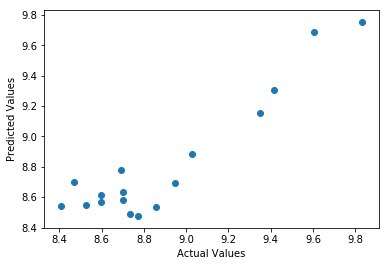

In [722]:
plt.scatter(test['mean_temp'],test['predict'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The R-Squared Value when applyng the model to the Test Data is 82%!

In [723]:
regression.score(test_X,test_Y)

0.81939377281367332

In [724]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,test['predict'])

0.02939802279575781

## Visuals 

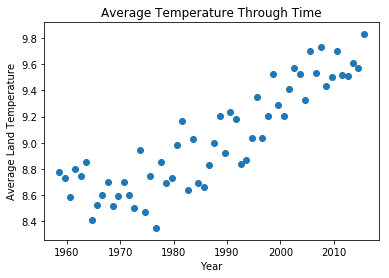

In [725]:
plt.scatter(df['Decimal Date'],df['mean_temp'])
plt.xlabel("Year")
plt.title("Average Temperature Through Time")
plt.ylabel("Average Land Temperature")
plt.show()

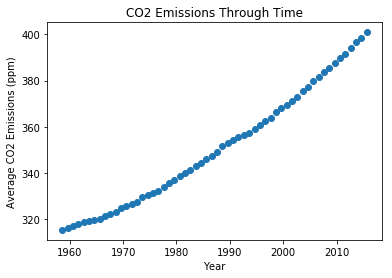

In [726]:
plt.scatter(df['Decimal Date'],df['meanEmissions'])
plt.xlabel("Year")
plt.title("CO2 Emissions Through Time")
plt.ylabel("Average CO2 Emissions (ppm)")
plt.show()

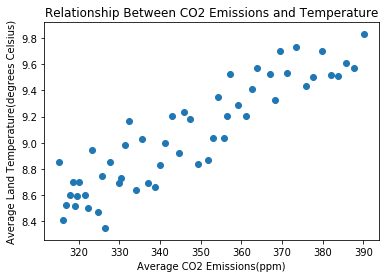

In [770]:
plt.scatter(df['meanEmissions'],df['mean_temp'])
plt.xlabel("Average CO2 Emissions(ppm)")
plt.title("Relationship Between CO2 Emissions and Temperature")
plt.ylabel("Average Land Temperature(degrees Celsius)")
plt.show()

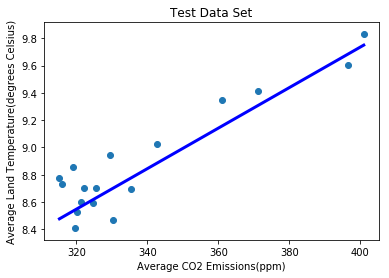

In [728]:
plt.scatter(test_X,test_Y)
plt.xlabel("Average CO2 Emissions(ppm)")
plt.ylabel("Average Land Temperature(degrees Celsius)")
plt.title("Test Data Set")
plt.plot(test_X, test.predict, color='blue', linewidth=3)
plt.show()

So, this is all interesting, but do we really think CO2 Emissions affect temperature immediately? To me, it seems like it would take time 
for emissions to affect temperature. I now decide to do the same analysis, but by seeing the affect of CO2 Emissions from one year 
on the temperature 8 years later. I recombine the pollution and temperature datasets, but this time the data in the pollution columns was technically collected 5 years before the data in the temperature columns. 

## Analysis Part 2

In [763]:
with open('../../../datasets/TempData/archive.csv') as file:
    df_poll=pd.read_csv(file)


df_poll['Year']=df_poll['Year']+5


new_list=[]
for i in df_poll.Month:
    new_list.append("{:02}".format(i))
        
df_poll.Month=new_list


df_poll=df_poll[df_poll['Month']=='08']


df_poll['Year']=df_poll.Year.astype(str)
df_poll['Month']=df_poll.Month.astype(str)

df_poll['dt']=df_poll['Year']+'-'+df_poll['Month']+'-'+'01'
df_poll['dt']=pd.to_datetime(df_poll['dt'])
print(df_poll.head())


df_poll['Emissions']=df_poll['Seasonally Adjusted CO2 Fit (ppm)']
df_poll['meanEmissions'] = df_poll.groupby('Year').Emissions.transform(np.mean)

df=pd.merge(df_temp,df_poll,how='inner',on='dt')
df.head()

    Year Month  Decimal Date  Carbon Dioxide (ppm)  \
7   1963    08     1958.6219                314.93   
19  1964    08     1959.6219                314.80   
31  1965    08     1960.6230                315.90   
43  1966    08     1961.6219                316.79   
55  1967    08     1962.6219                317.40   

    Seasonally Adjusted CO2 (ppm)  Carbon Dioxide Fit (ppm)  \
7                          316.17                    314.01   
19                         316.04                    314.84   
31                         317.18                    315.71   
43                         318.05                    316.47   
55                         318.66                    317.26   

    Seasonally Adjusted CO2 Fit (ppm)         dt  
7                              315.29 1963-08-01  
19                             316.12 1964-08-01  
31                             317.01 1965-08-01  
43                             317.76 1966-08-01  
55                             318.55 196

,dt,Year_x,LandAverageTemperature,LandAverageTemperatureUncertainty,Unnamed: 7,Unnamed: 8,mean_temp,Year_y,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Emissions,meanEmissions
0,1963-08-01,1963,14.309,0.061,NaN,NaN,8.856000,1963,08,1958.6219,314.93,316.17,314.01,315.29,315.29,315.29
1,1964-08-01,1964,13.678,0.178,NaN,NaN,8.409667,1964,08,1959.6219,314.80,316.04,314.84,316.12,316.12,316.12
2,1965-08-01,1965,13.807,0.086,NaN,NaN,8.527417,1965,08,1960.6230,315.90,317.18,315.71,317.01,317.01,317.01
3,1966-08-01,1966,13.731,0.101,NaN,NaN,8.599333,1966,08,1961.6219,316.79,318.05,316.47,317.76,317.76,317.76
4,1967-08-01,1967,13.821,0.107,NaN,NaN,8.700083,1967,08,1962.6219,317.40,318.66,317.26,318.55,318.55,318.55


I check to make sure the analysis variables have no null values.

In [764]:
print(df['mean_temp'].isnull().sum())
df['meanEmissions'].isnull().sum()

0


0

I then create the train and test sets and fit the regression model.

In [765]:
train=df.sample(frac=7/10, random_state=1)
test=df.drop(train.index)
print(test.shape)
print(train.shape)

regression=linear_model.LinearRegression()

train_X = np.asarray(train[['meanEmissions']])
train_Y = np.asarray(train[['mean_temp']])

test_X = np.asarray(test[['meanEmissions']])
test_Y = np.asarray(test[['mean_temp']])

regression.fit(train_X,train_Y)

(16, 16)
(37, 16)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [766]:
print ("Intercept:")
print(regression.intercept_)
print ("Coefficient:")
print(regression.coef_)
print ("R-Squared:")
print(regression.score(train_X,train_Y))



Intercept:
[ 3.37771242]
Coefficient:
[[ 0.01639006]]
R-Squared:
0.774229773199


I then test the model on the test data set. Interestingly, the CO2 Emissions describe about 77% of the variation in the Average Land Temperatures data 5 years later. The R-Squared value of this model on the Test Set is also 0.85.

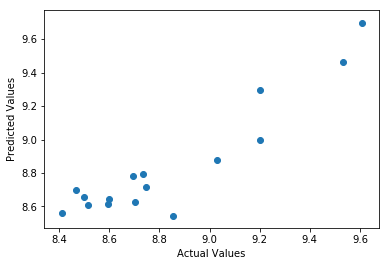

R-Squared for Test Set:
0.849885414016


In [767]:
test['predict']=regression.predict(test_X)
plt.scatter(test['mean_temp'],test['predict'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print("R-Squared for Test Set:")
print(regression.score(test_X,test_Y))

In [768]:
print("Mean Squared Error:")
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,test['predict'])

Mean Squared Error:


0.019587256421169322

There is a slightly lower MSE for the model when utilizing the CO2 Emissions from 5 Years Prior.

##  Visuals 

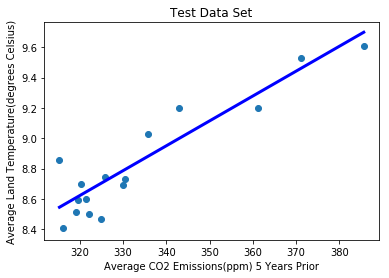

In [769]:
plt.scatter(test_X,test_Y)
plt.xlabel("Average CO2 Emissions(ppm) 5 Years Prior")
plt.ylabel("Average Land Temperature(degrees Celsius)")
plt.title("Test Data Set")
plt.plot(test_X, test.predict, color='blue', linewidth=3)
plt.show()

# Conclusions

It is clear that there is a significant relationship between CO2 Emissions and Land Temperature. For a CO2 Emission  increase of 1 ppm, there  is 
a 0.02 degrees Celsius increase in Average Land Temperature 5 Years later. Before you leave the house, remember to turn the lights off! 30 years later,
you might be thanking youself in the heat of the summer. 

This analysis could be improved with more data. Unfortunately, the analysis was limited to 58 rows due to the fact that CO2 Emissions
have only been collected since 1958. Collecting more data on CO2 Emissions could result in a more accurate model.

The analysis could also be improved by adding more greenhouse gases, such as methane or nitrous oxide, as independent variables. It would be interesting to see if one
greenhouse gas had a stronger relationship with temperature.